# Dataset de competição

## Fase 0: Imports e Leitura dos Dados

In [1]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # Used in Data Processing
from sklearn import preprocessing

# Definir o número máximo de colunas do pandas para 40
pd.set_option('display.max_columns', 40)

The following configuration was implemented to avoid pandas from considering that the 'None' value in the column 'Injeçao na rede (kWh)' is NaN.

In [2]:
allowed_nans = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN',
                '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA',
                'NULL', 'NaN', 'n/a', 'nan', 'null']

treino = pd.read_csv('datasets/treino.csv', na_values=allowed_nans, keep_default_na=False)
teste = pd.read_csv('datasets/teste.csv', na_values=allowed_nans, keep_default_na=False)

## Fase 1: Exploração Simples dos Dados

In [3]:
treino.shape

(11016, 21)

In [4]:
treino.columns

Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description', 'Data',
       'Hora', 'Normal (kWh)', 'Horario Economico (kWh)', 'Autoconsumo (kWh)',
       'Injeçao na rede (kWh)'],
      dtype='object')

In [5]:
treino.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh)
0,1632873600,2021-09-29 00:00:00+00:00,local,13.97,13.54,11.45,14.04,1027,1027.9,1004.4,81,1.96,NaN,87,overcast clouds,2021-09-29,0,0.0,0.0,0.0,None
1,1632877200,2021-09-29 01:00:00+00:00,local,13.48,13.02,13.43,13.90,1028,1027.9,1004.4,82,1.83,NaN,91,overcast clouds,2021-09-29,1,0.0,0.0,0.0,None
2,1632880800,2021-09-29 02:00:00+00:00,local,12.93,12.47,12.72,13.43,1027,1027.8,1004.3,84,1.96,NaN,93,overcast clouds,2021-09-29,2,0.0,0.0,0.0,None
3,1632884400,2021-09-29 03:00:00+00:00,local,12.61,12.15,10.34,12.93,1027,1027.6,1004.1,85,1.85,NaN,95,overcast clouds,2021-09-29,3,0.0,0.0,0.0,None
4,1632888000,2021-09-29 04:00:00+00:00,local,12.61,12.17,9.79,12.93,1027,1027.8,1004.3,86,1.83,NaN,93,overcast clouds,2021-09-29,4,0.0,0.0,0.0,None


In [6]:
treino.describe()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh)
count,1.101600e+04,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,2284.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,1.652701e+09,16.182991,15.826868,14.195064,17.288098,1018.396605,1018.590151,995.558696,76.570715,2.672039,0.896642,54.000908,11.500000,0.202278,0.159714,0.117314
std,1.144868e+07,5.756972,6.264860,4.956014,6.164689,6.203379,6.199122,5.931816,16.268260,1.476158,1.079381,40.553002,6.922501,0.349478,0.271792,0.176762
min,1.632874e+09,0.320000,-2.190000,-0.640000,1.330000,994.000000,994.500000,971.700000,19.000000,0.060000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.642787e+09,12.080000,11.507500,10.720000,12.890000,1015.000000,1014.900000,992.100000,66.000000,1.620000,0.210000,7.000000,5.750000,0.000000,0.000000,0.000000
50%,1.652701e+09,15.625000,15.230000,14.230000,16.260000,1018.000000,1018.400000,995.500000,81.000000,2.400000,0.460000,60.000000,11.500000,0.000000,0.000000,0.000000
75%,1.662614e+09,19.270000,19.260000,17.490000,20.340000,1022.000000,1022.700000,999.500000,91.000000,3.420000,1.092500,98.000000,17.250000,0.314000,0.288000,0.227000
max,1.672528e+09,40.850000,41.330000,36.720000,41.450000,1034.000000,1033.900000,1010.200000,100.000000,11.100000,7.450000,100.000000,23.000000,3.251000,6.978000,1.192000


In [7]:
treino.duplicated().any()

False

In [8]:
treino.isna().any()

dt                         False
dt_iso                     False
city_name                  False
temp                       False
feels_like                 False
temp_min                   False
temp_max                   False
pressure                   False
sea_level                  False
grnd_level                 False
humidity                   False
wind_speed                 False
rain_1h                     True
clouds_all                 False
weather_description        False
Data                       False
Hora                       False
Normal (kWh)               False
Horario Economico (kWh)    False
Autoconsumo (kWh)          False
Injeçao na rede (kWh)      False
dtype: bool

In [9]:
treino.dtypes

dt                           int64
dt_iso                      object
city_name                   object
temp                       float64
feels_like                 float64
temp_min                   float64
temp_max                   float64
pressure                     int64
sea_level                  float64
grnd_level                 float64
humidity                     int64
wind_speed                 float64
rain_1h                    float64
clouds_all                   int64
weather_description         object
Data                        object
Hora                         int64
Normal (kWh)               float64
Horario Economico (kWh)    float64
Autoconsumo (kWh)          float64
Injeçao na rede (kWh)       object
dtype: object

In [10]:
treino['Normal (kWh)'].value_counts()

Normal (kWh)
0.000    6018
0.001      23
0.008      19
0.252      17
0.016      17
         ... 
1.479       1
1.024       1
0.839       1
0.832       1
1.327       1
Name: count, Length: 1282, dtype: int64

In [11]:
treino['weather_description'].value_counts()

weather_description
sky is clear            3010
overcast clouds         2430
light rain              1662
broken clouds           1413
scattered clouds        1148
few clouds               731
moderate rain            562
heavy intensity rain      60
Name: count, dtype: int64

In [12]:
treino['rain_1h'].isna().sum()

8732

In [13]:
treino[treino['rain_1h'].isnull()]['weather_description'].value_counts()

weather_description
sky is clear        3010
overcast clouds     2430
broken clouds       1413
scattered clouds    1148
few clouds           731
Name: count, dtype: int64

In [14]:
treino[treino['rain_1h'].notnull()]['weather_description'].value_counts()

weather_description
light rain              1662
moderate rain            562
heavy intensity rain      60
Name: count, dtype: int64

When the feature "rain_1h" is a missing value, the values of the feature "weather_description" are one of the above, none of the values represent rain, so we can conclude that when the "rain_1h" is null it represents the value 0.

In [15]:
treino['city_name'].value_counts()

city_name
local    11016
Name: count, dtype: int64

In [16]:
treino['city_name'].nunique()

1

'city_name' is a useless column because it only has 1 value. 

In [17]:
treino['dt_iso'].isna().sum()

0

'dt_iso' has 0 missing values so it can replace the columns 'Data' and 'Hora' that have some missing values.

### Outlier detection

Checking for outliers in the features: "Normal (kWH)", "Horario Economico (kWh)" and "Autoconsumo (kWh)". This information lets us decide which way we are going to handle the missing values in this features.

<Axes: >

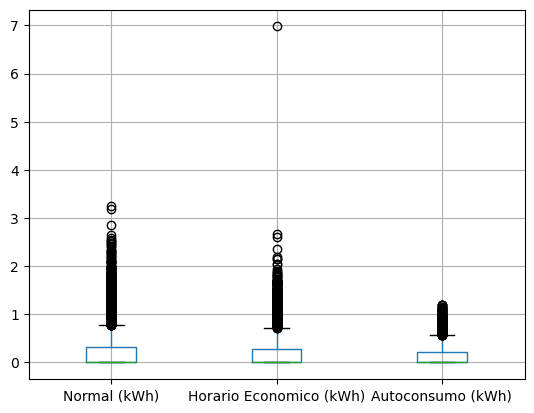

In [18]:
tc = treino.copy()
columns_to_drop = ['Data', 'Hora', 'Injeçao na rede (kWh)', 'dt', 'dt_iso', 'city_name', 'temp' ,'feels_like', 'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all', 'weather_description']
tc.drop(columns_to_drop, inplace=True, axis=1)
tc.boxplot()

All 3 features have outliers, the best way to treat their missing values is by using the median and not the mean.

In [19]:
columns = ['Normal (kWh)', 'Horario Economico (kWh)', 'Autoconsumo (kWh)', 'temp', 'feels_like',
           'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed', 'rain_1h']

# Function to detect outliers using IQR (Inter Quartile Range) 
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Detect outliers in each column of the DataFrame
outliers = treino[columns].apply(detect_outliers_iqr)
rows_with_outliers = outliers.any(axis=1)
indexes_with_outliers = treino.index[rows_with_outliers].tolist()
len(indexes_with_outliers)

2377

There are 2366 rows containing outliers in all the dataset.

In [20]:
treino.isna().sum()

dt                            0
dt_iso                        0
city_name                     0
temp                          0
feels_like                    0
temp_min                      0
temp_max                      0
pressure                      0
sea_level                     0
grnd_level                    0
humidity                      0
wind_speed                    0
rain_1h                    8732
clouds_all                    0
weather_description           0
Data                          0
Hora                          0
Normal (kWh)                  0
Horario Economico (kWh)       0
Autoconsumo (kWh)             0
Injeçao na rede (kWh)         0
dtype: int64

In [21]:
teste.isna().sum()

dt                          504
dt_iso                        0
city_name                   504
temp                          0
feels_like                    0
temp_min                      0
temp_max                      0
pressure                    504
sea_level                     0
grnd_level                    0
humidity                      0
wind_speed                    0
rain_1h                    2050
clouds_all                    0
weather_description         504
Data                          0
Hora                          0
Normal (kWh)                  0
Horario Economico (kWh)       0
Autoconsumo (kWh)             0
dtype: int64

## Fase 2: Tratamento dos Dados

The column 'city_name' only has 1 possible value so it is useless and must the removed from the dataset. 

In [22]:
treino.drop('city_name', inplace=True, axis=1)
teste.drop('city_name', inplace=True, axis=1)

Like it was stated before, the features 'sea_level' and 'grnd_level' have 100% missing value presence and so must be removed.

In [23]:
# treino.drop('sea_level', inplace=True, axis=1)
# treino.drop('grnd_level', inplace=True, axis=1)
#  
# teste.drop('sea_level', inplace=True, axis=1)
# teste.drop('grnd_level', inplace=True, axis=1)

The column 'dt_iso' will replace the columns 'Data' and 'Hora'. The 'dt_iso' column is going to also be split into two new columns: 'Date' and 'Hour'.

In [24]:
def toDate(d):
    return re.search(r'\d+\-\d+\-\d+', d).group()

def toHour(h):
    return re.search(r'(\d+)\:\d+\:\d+', h).group(1)

treino.drop('Data', inplace=True, axis=1)
treino.drop('Hora', inplace=True, axis=1)
hour = treino['dt_iso']
treino.insert(0, 'Hour', hour)
treino.rename(columns = {'dt_iso':'Date'}, inplace = True)

dates = treino['Date'].apply(toDate)
treino['Date'] = dates
hours = treino['Hour'].apply(toHour)
treino['Hour'] = hours
treino['Hour'] = treino['Hour'].astype(int)

dates = treino.pop('Date') 
treino.insert(0, 'Date', dates) 
dts = treino.pop('dt') 
treino.insert(0, 'dt', dts)
treino

,dt,Date,Hour,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh)
0,1632873600,2021-09-29,0,13.97,13.54,11.45,14.04,1027,1027.9,1004.4,81,1.96,NaN,87,overcast clouds,0.000,0.000,0.0,None
1,1632877200,2021-09-29,1,13.48,13.02,13.43,13.90,1028,1027.9,1004.4,82,1.83,NaN,91,overcast clouds,0.000,0.000,0.0,None
2,1632880800,2021-09-29,2,12.93,12.47,12.72,13.43,1027,1027.8,1004.3,84,1.96,NaN,93,overcast clouds,0.000,0.000,0.0,None
3,1632884400,2021-09-29,3,12.61,12.15,10.34,12.93,1027,1027.6,1004.1,85,1.85,NaN,95,overcast clouds,0.000,0.000,0.0,None
4,1632888000,2021-09-29,4,12.61,12.17,9.79,12.93,1027,1027.8,1004.3,86,1.83,NaN,93,overcast clouds,0.000,0.000,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1672513200,2022-12-31,19,15.70,15.57,15.57,15.72,1018,1018.4,995.3,86,5.56,3.58,100,moderate rain,1.693,0.000,0.0,None
11012,1672516800,2022-12-31,20,15.55,15.43,12.72,15.70,1018,1018.8,995.7,87,4.47,4.20,100,heavy intensity rain,1.327,0.000,0.0,None
11013,1672520400,2022-12-31,21,13.45,13.28,12.23,13.99,1019,1019.0,995.9,93,3.29,4.23,100,heavy intensity rain,0.757,0.000,0.0,None
11014,1672524000,2022-12-31,22,12.93,12.73,12.23,13.43,1019,1019.0,995.9,94,1.49,3.90,100,moderate rain,0.000,0.675,0.0,None


For the "teste" dataset, we use the columns "Data" e "Hora" to replace the missing values from the "dt_iso" column, basically we do the opposite of the "treino" dataset.

In [25]:
teste.drop('dt_iso', inplace=True, axis=1)
teste.rename(columns = {'Data':'Date'}, inplace = True)
teste.rename(columns = {'Hora':'Hour'}, inplace = True)
teste['Hour'] = teste['Hour'].astype(int)

dts = teste.pop('dt') 
teste.insert(0, 'dt', dts)
teste

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,Date,Hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh)
0,1.672531e+09,12.93,12.76,12.72,13.43,1019.0,1019.0,995.8,95,2.02,3.72,100.0,moderate rain,2023-01-01,0,0.000,0.467,0.000
1,1.672535e+09,13.49,13.38,13.43,13.90,1018.0,1018.1,994.9,95,2.18,3.26,100.0,moderate rain,2023-01-01,1,0.000,0.577,0.000
2,1.672538e+09,13.55,13.44,13.48,14.82,1017.0,1016.8,993.7,95,2.88,2.44,100.0,moderate rain,2023-01-01,2,0.000,0.346,0.000
3,1.672542e+09,13.61,13.51,12.01,14.82,1016.0,1016.2,993.1,95,3.63,1.74,100.0,moderate rain,2023-01-01,3,0.000,0.270,0.000
4,1.672546e+09,13.59,13.49,12.01,14.82,1015.0,1015.3,992.3,95,4.58,1.13,100.0,moderate rain,2023-01-01,4,0.000,0.252,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,NaN,20.10,18.10,3.60,20.40,NaN,1015.1,992.6,35,1.20,NaN,0.0,NaN,2023-04-04,19,0.953,0.000,0.012
2252,NaN,13.60,11.50,3.60,20.40,NaN,1016.1,993.1,63,2.47,NaN,0.0,NaN,2023-04-04,20,0.915,0.000,0.000
2253,NaN,12.60,10.60,3.60,20.40,NaN,1017.0,993.9,67,2.22,NaN,2.0,NaN,2023-04-04,21,0.479,0.000,0.000
2254,NaN,11.70,9.50,3.60,20.40,NaN,1017.5,994.3,68,2.41,NaN,1.0,NaN,2023-04-04,22,0.000,0.497,0.000


The "dt" column is a timestamp (an id for the time), and so it is useless and must be removed

In [26]:
treino.drop('dt', inplace=True, axis=1)
teste.drop('dt', inplace=True, axis=1)

Another 2 columns that we can create are the column 'Month', representing the current month of the instance, and the column 'Season', representing the current season of the instance.

In [27]:
monthsL = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

def toMonth(m):
    return monthsL[int(re.search(r'\-(\d+)\-', m).group(1))-1]

def toSeason(s):
    m = int(re.search(r'\-(\d+)\-', s).group(1))
    if m >= 3 and m <= 5:
        return 'Spring'
    if m >= 6 and m <= 8:
        return 'Summer'
    if m >= 9 and m <= 11:
        return 'Autumn'
    if (m >= 1 and m <= 2) or m == 12:
        return 'Winter'

# Treino
months = treino['Date'].apply(toMonth)
seasons = treino['Date'].apply(toSeason)

treino.insert(2, 'Season', seasons)
treino.insert(3, 'Month', months)

# Teste
months = teste['Date'].apply(toMonth)
seasons = teste['Date'].apply(toSeason)

teste.insert(2, 'Season', seasons)
teste.insert(3, 'Month', months)

In [28]:
# Remoção das linhas com outliers
treino.drop(indexes_with_outliers, inplace=True)
treino.shape

(8639, 20)

Filling the "rain_1h" missing values with the value 0.

In [29]:
treino['rain_1h'] = treino['rain_1h'].fillna(0)
teste['rain_1h'] = teste['rain_1h'].fillna(0)

The feature "weather_description" in the "teste" dataset has 504 entries with missing values. For now, we will use the mode to treat this missing values

In [30]:
# teste['weather_description'].fillna(teste['weather_description'].mode()[0], inplace=True)
from sklearn.tree import DecisionTreeClassifier

label_encoder_wd = preprocessing.LabelEncoder() 

teste_wd = teste.copy()

teste_wd['Date'] = label_encoder_wd.fit_transform(teste_wd['Date'])
teste_wd['Season'] = label_encoder_wd.fit_transform(teste_wd['Season'])
teste_wd['Month'] = label_encoder_wd.fit_transform(teste_wd['Month'])

treino_wd = teste_wd.dropna()
teste_wd = teste_wd[teste_wd['weather_description'].isnull()]

X_treino_wd = treino_wd.drop('weather_description', axis=1)
y_treino_wd = treino_wd['weather_description']

X_teste_wd = teste_wd.drop('weather_description', axis=1)

clf = DecisionTreeClassifier(random_state=183)
clf.fit(X_treino_wd, y_treino_wd)
predictions = clf.predict(X_teste_wd)

# Fill the missing values with the predictions
indicies_of_missing = teste[teste['weather_description'].isnull()].index # list of the missing indices
for fill_index, dataframe_index in enumerate(indicies_of_missing):
    teste.loc[dataframe_index, 'weather_description'] = predictions[fill_index]

predictions

array(['sky is clear', 'sky is clear', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'scattered clouds', 'scattered clouds',
       'scattered clouds', 'scattered clouds', 'scattered clouds',
       'scattered clouds', 'scattered clouds', 'scattered clouds',
       'scattered clouds', 'scattered clouds', 'scattered clouds',
       'scattered clouds', 'scattered clouds', 'scattered clouds',
       'light rain', 'light rain', 'broken clouds', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'scattered clouds', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light 

In the first 672 entries of the "treino" dataset the features "Normal (kWh)", "Autoconsumo (kWh)", "Horario Economico (kWh)" and "Injeçao na rede (kWh)" all have missing values. Because there is a large number of features with missing values in this entries and because this only represents 5% of the entire dataset we decided to remove all this entries.

In [31]:
treino.dropna(subset=['Injeçao na rede (kWh)'], inplace=True)

In [32]:
treino

,Date,Hour,Season,Month,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh)
0,2021-09-29,0,Autumn,September,13.97,13.54,11.45,14.04,1027,1027.9,1004.4,81,1.96,0.0,87,overcast clouds,0.0,0.000,0.0,None
1,2021-09-29,1,Autumn,September,13.48,13.02,13.43,13.90,1028,1027.9,1004.4,82,1.83,0.0,91,overcast clouds,0.0,0.000,0.0,None
2,2021-09-29,2,Autumn,September,12.93,12.47,12.72,13.43,1027,1027.8,1004.3,84,1.96,0.0,93,overcast clouds,0.0,0.000,0.0,None
3,2021-09-29,3,Autumn,September,12.61,12.15,10.34,12.93,1027,1027.6,1004.1,85,1.85,0.0,95,overcast clouds,0.0,0.000,0.0,None
4,2021-09-29,4,Autumn,September,12.61,12.17,9.79,12.93,1027,1027.8,1004.3,86,1.83,0.0,93,overcast clouds,0.0,0.000,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,2022-12-31,0,Winter,December,15.21,14.90,14.23,15.72,1021,1020.7,997.5,81,6.01,0.0,99,overcast clouds,0.0,0.718,0.0,None
10996,2022-12-31,4,Winter,December,14.24,13.65,13.43,14.72,1019,1019.2,996.0,74,5.89,0.0,66,broken clouds,0.0,0.604,0.0,None
10997,2022-12-31,5,Winter,December,14.24,13.57,13.43,14.72,1019,1018.8,995.6,71,5.72,0.0,37,scattered clouds,0.0,0.536,0.0,None
10998,2022-12-31,6,Winter,December,14.28,13.57,13.12,15.01,1019,1018.7,995.5,69,5.71,0.0,34,scattered clouds,0.0,0.474,0.0,None


In [33]:
teste

,temp,feels_like,Season,Month,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,Date,Hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh)
0,12.93,12.76,Winter,January,12.72,13.43,1019.0,1019.0,995.8,95,2.02,3.72,100.0,moderate rain,2023-01-01,0,0.000,0.467,0.000
1,13.49,13.38,Winter,January,13.43,13.90,1018.0,1018.1,994.9,95,2.18,3.26,100.0,moderate rain,2023-01-01,1,0.000,0.577,0.000
2,13.55,13.44,Winter,January,13.48,14.82,1017.0,1016.8,993.7,95,2.88,2.44,100.0,moderate rain,2023-01-01,2,0.000,0.346,0.000
3,13.61,13.51,Winter,January,12.01,14.82,1016.0,1016.2,993.1,95,3.63,1.74,100.0,moderate rain,2023-01-01,3,0.000,0.270,0.000
4,13.59,13.49,Winter,January,12.01,14.82,1015.0,1015.3,992.3,95,4.58,1.13,100.0,moderate rain,2023-01-01,4,0.000,0.252,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,20.10,18.10,Spring,April,3.60,20.40,NaN,1015.1,992.6,35,1.20,0.00,0.0,light rain,2023-04-04,19,0.953,0.000,0.012
2252,13.60,11.50,Spring,April,3.60,20.40,NaN,1016.1,993.1,63,2.47,0.00,0.0,light rain,2023-04-04,20,0.915,0.000,0.000
2253,12.60,10.60,Spring,April,3.60,20.40,NaN,1017.0,993.9,67,2.22,0.00,2.0,light rain,2023-04-04,21,0.479,0.000,0.000
2254,11.70,9.50,Spring,April,3.60,20.40,NaN,1017.5,994.3,68,2.41,0.00,1.0,light rain,2023-04-04,22,0.000,0.497,0.000


## Fase 3: Exploração Detalhada

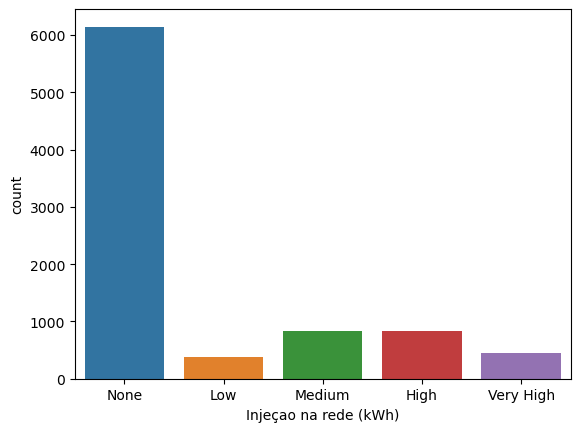

In [34]:
sns.countplot(x='Injeçao na rede (kWh)', data=treino)
plt.show()

### 'Hour' vs 'Normal (kWh)'

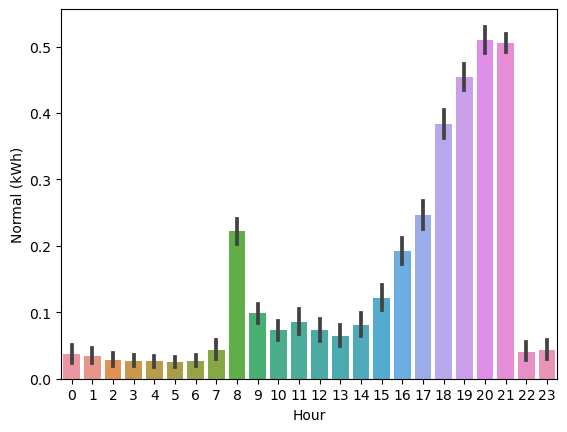

In [35]:
sns.barplot(x='Hour', y='Normal (kWh)', data=treino)
plt.show()

### 'Hour' vs 'Horario Economico (kWh)'

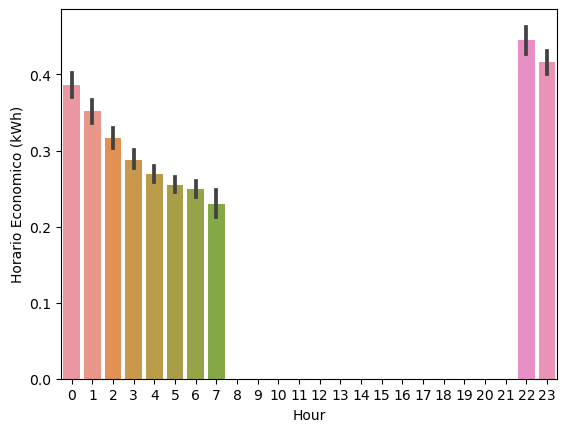

In [36]:
sns.barplot(x='Hour', y='Horario Economico (kWh)', data=treino)
plt.show()

### Relation: 'Month' with 'Injeçao na rede (kWh)'

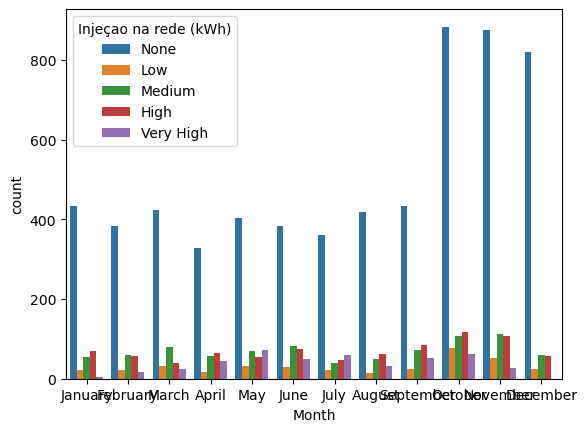

In [37]:
sns.countplot(x='Month', order=monthsL, hue='Injeçao na rede (kWh)', data=treino)
plt.show()

### Relation: 'Season' with 'Injeçao na rede (kWh)'

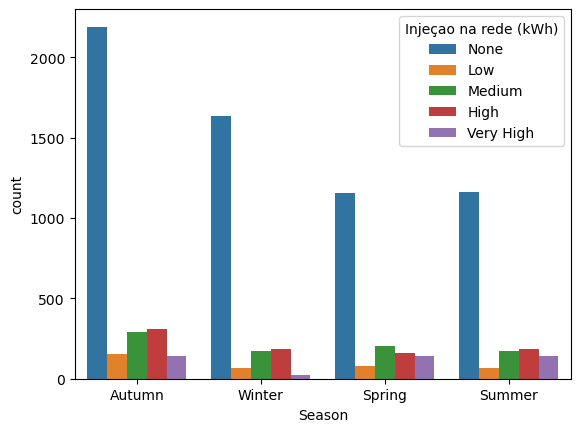

In [38]:
sns.countplot(x='Season', hue='Injeçao na rede (kWh)', data=treino)
plt.show()

### Relation: 'Normal (kWh)' with 'Injeçao na rede (kWh)'

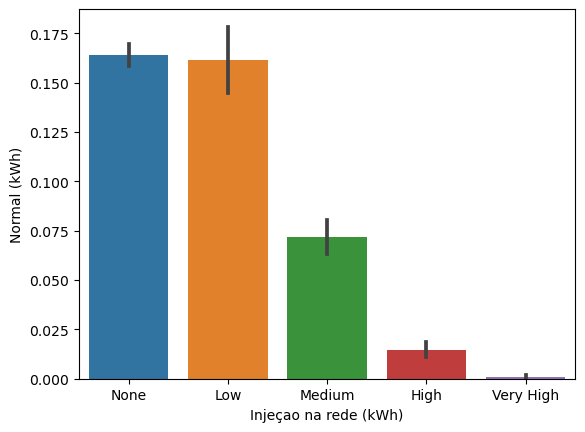

In [39]:
sns.barplot(x='Injeçao na rede (kWh)', y='Normal (kWh)', data=treino)
plt.show()

### Relation: 'Horario Economico (kWh)' with 'Injeçao na rede (kWh)'

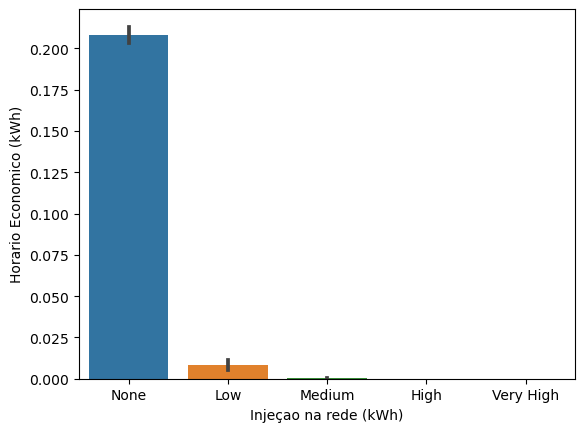

In [40]:
sns.barplot(x='Injeçao na rede (kWh)', y='Horario Economico (kWh)', data=treino)
plt.show()

### Relation: 'Autoconsumo (kWh)' with 'Injeçao na rede (kWh)'

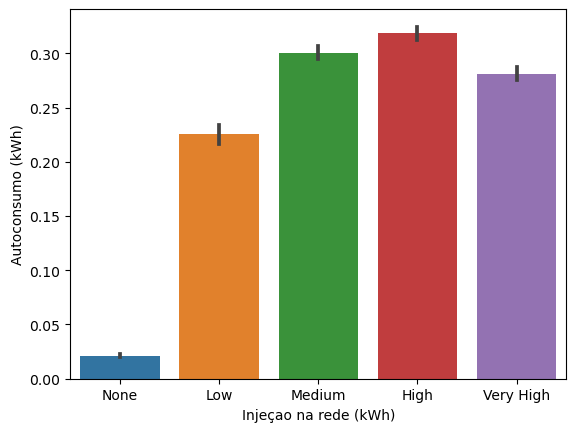

In [41]:
sns.barplot(x='Injeçao na rede (kWh)', y='Autoconsumo (kWh)', data=treino)
plt.show()

### Relation: 'temp' with 'Injeçao na rede (kWh)'

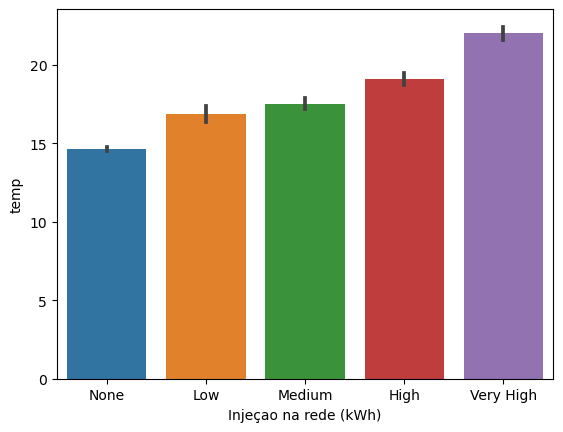

In [42]:
sns.barplot(x='Injeçao na rede (kWh)', y='temp', data=treino)
plt.show()

### Relation: 'feels_like' with 'Injeçao na rede (kWh)'

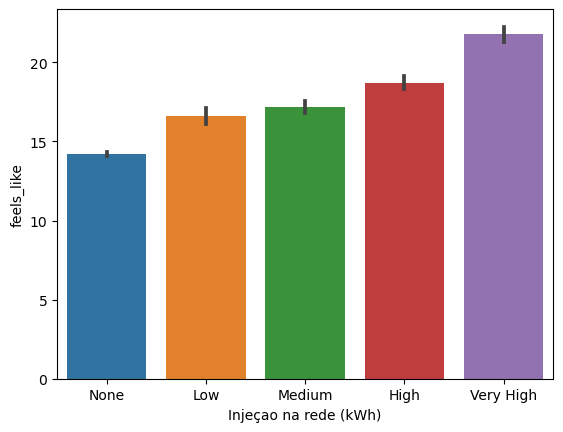

In [43]:
sns.barplot(x='Injeçao na rede (kWh)', y='feels_like', data=treino)
plt.show()

### Relation: 'temp_min' with 'Injeçao na rede (kWh)'

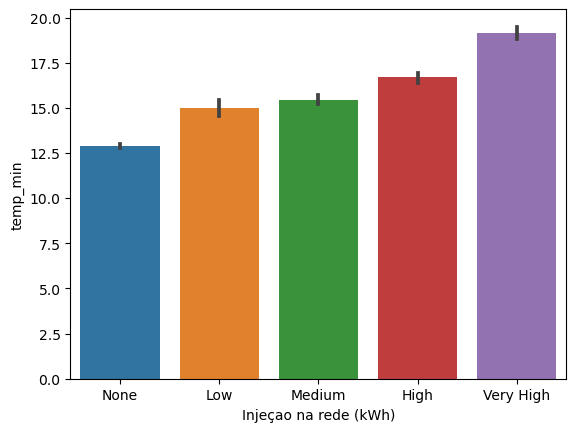

In [44]:
sns.barplot(x='Injeçao na rede (kWh)', y='temp_min', data=treino)
plt.show()

### Relation: 'temp_max' with 'Injeçao na rede (kWh)'

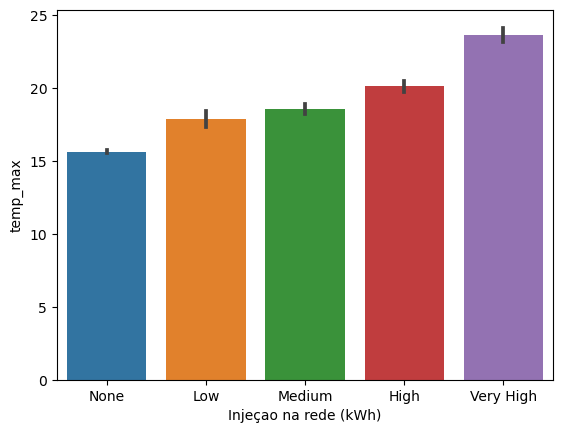

In [45]:
sns.barplot(x='Injeçao na rede (kWh)', y='temp_max', data=treino)
plt.show()

### Relation: 'pressure' with 'Injeçao na rede (kWh)'

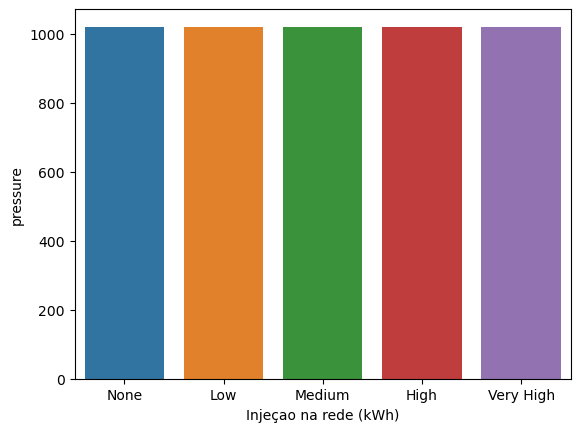

In [46]:
sns.barplot(x='Injeçao na rede (kWh)', y='pressure', data=treino)
plt.show()

### Relation: 'humidity' with 'Injeçao na rede (kWh)'

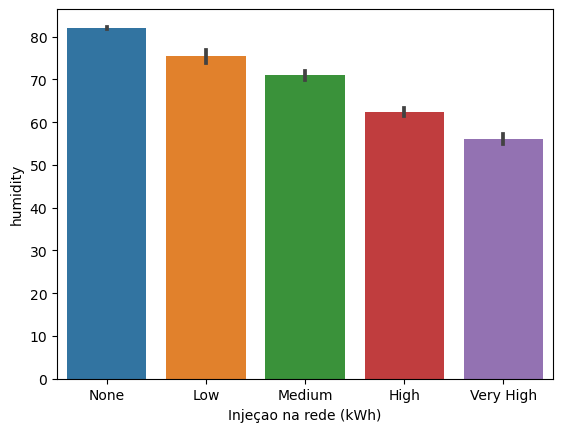

In [47]:
sns.barplot(x='Injeçao na rede (kWh)', y='humidity', data=treino)
plt.show()

### Relation: 'wind_speed' with 'Injeçao na rede (kWh)'

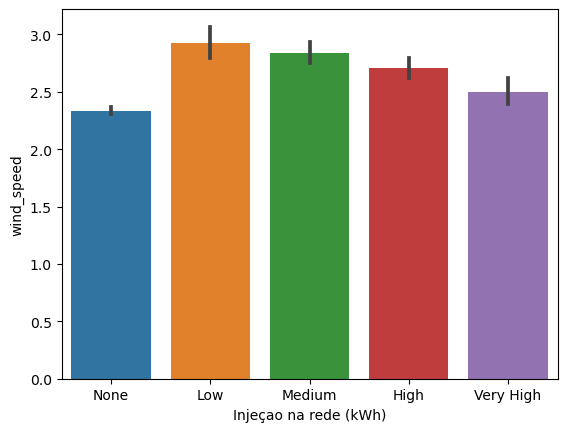

In [48]:
sns.barplot(x='Injeçao na rede (kWh)', y='wind_speed', data=treino)
plt.show()

We can check that the feature 'rain_1h', when the feature 'Injeçao na rede (kWh)' takes the value 'Very High', is very scattered.

### Relation: 'clouds_all' with 'Injeçao na rede (kWh)'

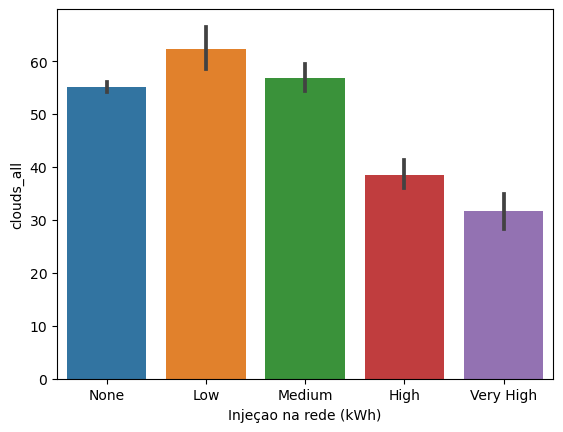

In [49]:
sns.barplot(x='Injeçao na rede (kWh)', y='clouds_all', data=treino)
plt.show()

### Relation: 'weather_description' with 'Injeçao na rede (kWh)'

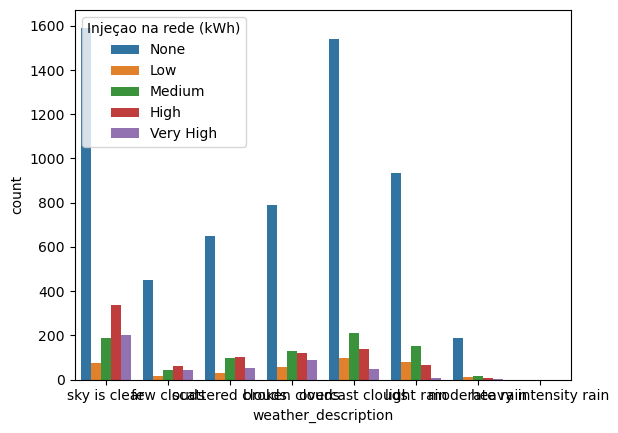

In [50]:
w_d_order = ['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds', 'overcast clouds', 'light rain', 'moderate rain', 'heavy intensity rain']

sns.countplot(x='weather_description', order= w_d_order, hue='Injeçao na rede (kWh)', data=treino)
plt.show()

### Correlation Matrix

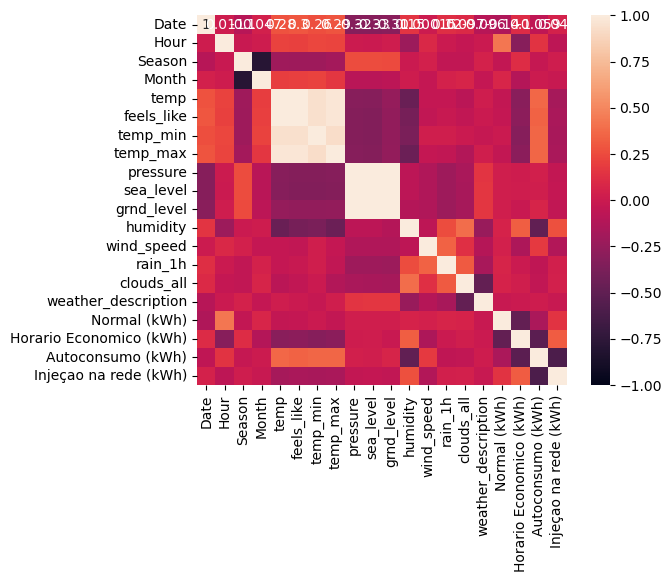

In [51]:
label_encoder_inr = preprocessing.LabelEncoder() 
label_encoder_wd = preprocessing.LabelEncoder()
label_encoder_d = preprocessing.LabelEncoder()  
label_encoder_s = preprocessing.LabelEncoder() 
label_encoder_m = preprocessing.LabelEncoder() 

treino['Injeçao na rede (kWh)'] = label_encoder_inr.fit_transform(treino['Injeçao na rede (kWh)'])
treino['weather_description'] = label_encoder_wd.fit_transform(treino['weather_description'])
treino['Date'] = label_encoder_d.fit_transform(treino['Date']) 
treino['Season'] = label_encoder_s.fit_transform(treino['Season']) 
treino['Month'] = label_encoder_m.fit_transform(treino['Month']) 

corr_matrix = treino.corr(numeric_only=True)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)
plt.show()

In [52]:
treino[treino.columns[1:]].corr()['Injeçao na rede (kWh)'][:]

Hour                      -0.068856
Season                     0.017735
Month                     -0.018177
temp                      -0.173765
feels_like                -0.158655
temp_min                  -0.169097
temp_max                  -0.157732
pressure                  -0.039895
sea_level                 -0.036037
grnd_level                -0.053138
humidity                   0.270309
wind_speed                -0.118026
rain_1h                    0.034931
clouds_all                 0.045011
weather_description       -0.021949
Normal (kWh)               0.146748
Horario Economico (kWh)    0.319077
Autoconsumo (kWh)         -0.595954
Injeçao na rede (kWh)      1.000000
Name: Injeçao na rede (kWh), dtype: float64

In [53]:
treino['Injeçao na rede (kWh)']= label_encoder_inr.inverse_transform(treino['Injeçao na rede (kWh)'])
treino['weather_description']= label_encoder_wd.inverse_transform(treino['weather_description'])
treino['Date']= label_encoder_d.inverse_transform(treino['Date'])
treino['Season']= label_encoder_s.inverse_transform(treino['Season'])
treino['Month']= label_encoder_m.inverse_transform(treino['Month'])
treino

,Date,Hour,Season,Month,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh)
0,2021-09-29,0,Autumn,September,13.97,13.54,11.45,14.04,1027,1027.9,1004.4,81,1.96,0.0,87,overcast clouds,0.0,0.000,0.0,None
1,2021-09-29,1,Autumn,September,13.48,13.02,13.43,13.90,1028,1027.9,1004.4,82,1.83,0.0,91,overcast clouds,0.0,0.000,0.0,None
2,2021-09-29,2,Autumn,September,12.93,12.47,12.72,13.43,1027,1027.8,1004.3,84,1.96,0.0,93,overcast clouds,0.0,0.000,0.0,None
3,2021-09-29,3,Autumn,September,12.61,12.15,10.34,12.93,1027,1027.6,1004.1,85,1.85,0.0,95,overcast clouds,0.0,0.000,0.0,None
4,2021-09-29,4,Autumn,September,12.61,12.17,9.79,12.93,1027,1027.8,1004.3,86,1.83,0.0,93,overcast clouds,0.0,0.000,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,2022-12-31,0,Winter,December,15.21,14.90,14.23,15.72,1021,1020.7,997.5,81,6.01,0.0,99,overcast clouds,0.0,0.718,0.0,None
10996,2022-12-31,4,Winter,December,14.24,13.65,13.43,14.72,1019,1019.2,996.0,74,5.89,0.0,66,broken clouds,0.0,0.604,0.0,None
10997,2022-12-31,5,Winter,December,14.24,13.57,13.43,14.72,1019,1018.8,995.6,71,5.72,0.0,37,scattered clouds,0.0,0.536,0.0,None
10998,2022-12-31,6,Winter,December,14.28,13.57,13.12,15.01,1019,1018.7,995.5,69,5.71,0.0,34,scattered clouds,0.0,0.474,0.0,None


## Fase 4: Tratamento de Dados pré modelação

We already noticed that the feature 'pressure' has little to no impact in the target feature 'Injeçao na rede (kWh)'. We can now remove that feature.

In [54]:
treino.drop(columns=['pressure'], inplace=True, axis=1)
teste.drop(columns=['pressure'], inplace=True, axis=1)

Dropping of features with super low correlation with the target feature

In [55]:
columns_to_drop = ['Date', 'Hour', 'Month', 'wind_speed', 'clouds_all']

treino.drop(columns=columns_to_drop, inplace=True, axis=1)
teste.drop(columns=columns_to_drop, inplace=True, axis=1)

Our dataset is super inbalanced, there are much more None values in the target feature that all others. We are going to perform SMOTE (Syntetic Minority Over Sampling Technique) to address this inbalance.

In [56]:
order_mapping = {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
treino['Injeçao na rede (kWh)'] = treino['Injeçao na rede (kWh)'].map(order_mapping)

treino['weather_description'] = label_encoder_wd.fit_transform(treino['weather_description'])
treino['Season'] = label_encoder_s.fit_transform(treino['Season']) 

In [57]:
treino['Injeçao na rede (kWh)'].value_counts()

Injeçao na rede (kWh)
0    6144
2     841
3     836
4     447
1     371
Name: count, dtype: int64

In [58]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Sampling Pipeline
over_stategy={0:7777, 1:1500, 2:2000, 3: 2000, 4:1500}
under_strategy={0:5000, 1: 1000, 2: 1500, 3: 1500, 4:1000}
over = SMOTE(random_state=183, sampling_strategy=over_stategy)
under = RandomUnderSampler(random_state=183, sampling_strategy=under_strategy)
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)

X_treino = treino.drop('Injeçao na rede (kWh)', axis=1)
y_treino = treino['Injeçao na rede (kWh)']

X_treino_res, y_treino_res = pipeline.fit_resample(X_treino, y_treino) 

In [59]:
y_treino_res.value_counts()

Injeçao na rede (kWh)
0    5000
2    1500
3    1500
1    1000
4    1000
Name: count, dtype: int64

In [60]:
order_reverse_mapping = {0: 'None', 1: 'Low',2: 'Medium',3: 'High',4: 'Very High'}
y_treino_res = y_treino_res.map(order_reverse_mapping)
X_treino_res['weather_description'] = label_encoder_wd.inverse_transform(X_treino_res['weather_description'])
X_treino_res['Season'] = label_encoder_s.inverse_transform(X_treino_res['Season']) 

Write the resulting datasets for later use.

In [61]:
X_treino_res['Injeçao na rede (kWh)'] = y_treino_res
X_treino_res.to_csv(f'datasets/treinoTratado.csv', index=False)
teste.to_csv(f'datasets/testeTratado.csv', index=False)